# HW 18-19

# Imports

In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")


# Bias-Variance Trade

In [2]:
# It's the same dataset for both HW 18 and HW 19
data: np.ndarray = pd.read_csv("bias-variance-trade.txt", delimiter=" ", header=None).values.astype(np.float64)
x1 = data[:, 0]
y1 = data[:, 1]
x2 = data[:, 2]
y2 = data[:, 3]


# HW 18

In this problem, we will use the data in bias variance trade.txt to practice using cross-validation in model evaluation. The first column is one sample of the independent variable x, while the second is the dependent variable y that corresponds to those points. The third and fourth columns are the same for a different sample of the independent variable. You will want to complete the Bias-Variance Tradeoff problem before proceeding.

In [3]:
# (a) Fit the data from the first two columns using Legendre polynomials of orders 1 through 10.
# For each fit, preform leave-one-out cross validation and report the average error to the point
# left out. Note that this means for each order of polynomial, you will perform 20 fits. If you
# have not found a shortcut in your programming language of choice already, do so before
# proceeding.

# a design matrix is created as follows:
def design_mat(k: int, vec) -> np.ndarray:
    """ copied from HW 16 """
    A = np.stack([np.polynomial.legendre.Legendre.basis(i)(vec) for i in range(k)]).T
    return A

optimal_fit_k = -1
optimal_fit_mean_mse = np.inf
optimal_test_k = -1
optimal_test_resid = np.inf

for k in range(1,12):
    A = design_mat(k, x1)
    test_resids = []
    fit_mses = []
    for i in range(A.shape[0]):
        A_tmp = np.concatenate([A[:i], A[i+1:]])
        y1_tmp = np.concatenate([y1[:i], y1[i+1:]])
        A_i = A[i]
        y1_i = y1[i]
        
        theta_hat, sse_crossval, _, _ = np.linalg.lstsq(A_tmp, y1_tmp)
        mse_crossval = sse_crossval/A_tmp.shape[0]
        y1_i_hat = A_i@theta_hat
        test_resid = abs(y1_i_hat-y1_i)
        test_resids.append(test_resid)
        fit_mses.append(mse_crossval)

        print(f"With K={k}, leaving out row {i}, our fit MSE is {mse_crossval} and test residual is {test_resid}")
    mean_test_resid = np.mean(test_resids)
    mean_fit_mse = np.mean(fit_mses)
    print("="*20)
    print(f"Across all leave-one-out runs for K={k}:\n- Our average test residual is {mean_test_resid} and our average fit mse is {mean_fit_mse}")
    
    if mean_test_resid < optimal_test_resid:
        optimal_test_resid = mean_test_resid
        optimal_test_k = k
    if mean_fit_mse < optimal_fit_mean_mse:
        optimal_fit_mean_mse = mean_fit_mse
        optimal_fit_k = k

print("="*40)
print(f"For this dataset and bucket of models:\n- The ideal fit by test residual is K={optimal_test_k}, which has a mean test residual of {optimal_test_resid}\n- The ideal fit by fit mse is {optimal_fit_k}, which has a mean fit mse of {optimal_fit_mean_mse}")


With K=1, leaving out row 0, our fit MSE is [0.15328997] and test residual is 0.3683567385819108
With K=1, leaving out row 1, our fit MSE is [0.15396343] and test residual is 0.34959616727527376
With K=1, leaving out row 2, our fit MSE is [0.15694634] and test residual is 0.250118431909715
With K=1, leaving out row 3, our fit MSE is [0.15894036] and test residual is 0.15059502042414732
With K=1, leaving out row 4, our fit MSE is [0.15816128] and test residual is 0.1956029581896502
With K=1, leaving out row 5, our fit MSE is [0.15939403] and test residual is 0.11664257965398506
With K=1, leaving out row 6, our fit MSE is [0.14927922] and test residual is 0.46465214080537465
With K=1, leaving out row 7, our fit MSE is [0.15916202] and test residual is 0.13507648407008474
With K=1, leaving out row 8, our fit MSE is [0.15400719] and test residual is 0.3483422065965093
With K=1, leaving out row 9, our fit MSE is [0.14367974] and test residual is 0.5726178588970473
With K=1, leaving out row 

In [4]:
# (b) Identify the order of polynomial that yields the lowest average error. Is it the same as the
# best fitting models from the previous problem? What does this tell you about predictive
# modeling generally?

# As shown in the output from the cell above, the order of polynomial that yields the lowest
# mse in modeling is the tenth-order polynomial (11 terms, k=11). However, the order of polynomial
# that yields the lowest average test residual is the zero-th-order polynomial (1 term, k=1).
# This highlights that while the Legendre polynomials were effective at fitting the training data
# effectively, they did not effectively capture the underlying physics.

# HW 19

In this problem, we will revisit the data in bias variance trade.txt to demonstrate generalized aliasing. Remember that the first and third columns are samples of the independent variable x, while the second and fourth columns are samples of the dependent variable y that correspond to those points.

In [5]:
# (a) Combine the two samples into one dataset and generate a system matrix assuming a basis of
# sines and cosines with frequency that increases with column number (i.e. cos(x),cos(2x),cos(3x),
# etc.). Your system matrix should have 1,000 columns. Do not print this matrix.

# a design matrix is created as follows:
def design_mat(k: int, vec) -> np.ndarray:
    """ adapted from HW 18 """
    columns = []
    for i in range(k):
        con_plus = i+2
        con_pmod = con_plus%2
        con_split = con_plus-con_pmod
        constant = con_split/2
        if i%2==0:
            columns.append(np.sin(constant*vec))
        else:
            columns.append(np.cos(constant*vec))
    A = np.stack(columns).T
    return A

x_full = np.concatenate((x1, x2))
y_full = np.concatenate((y1, y2))
A_full = design_mat(1000, x_full)

# we won't print the full matrix, but just the first 5 columns of the first five rows to get a picture of it
pd.DataFrame(A_full[:10, :10])

,0,1,2,3,4,5,6,7,8,9
0,-0.160021,0.987114,-0.315917,0.948787,-0.463672,0.886007,-0.599476,0.800393,-0.719830,0.694150
1,-0.397202,0.917731,-0.729049,0.684462,-0.940940,0.338573,-0.998012,-0.063024,-0.890874,-0.454251
2,-0.472548,0.881305,-0.832918,0.553396,-0.995561,0.094116,-0.921867,-0.387506,-0.629330,-0.777138
3,-0.616901,0.787041,-0.971053,0.238866,-0.911614,-0.411047,-0.463902,-0.885886,0.181395,-0.983410
4,-0.380407,0.924819,-0.703615,0.710581,-0.921027,0.389499,-0.999951,0.009851,-0.928522,-0.371278
5,0.406080,0.913838,0.742182,0.670199,0.950388,0.311068,0.994818,-0.101667,0.867818,-0.496883
6,0.489518,0.871993,0.853712,0.520745,0.999345,0.036178,0.889132,-0.457650,0.551290,-0.834314
7,0.128753,0.991677,0.255363,0.966845,0.377722,0.925919,0.493793,0.869579,0.601645,0.798764
8,-0.319307,0.947651,-0.605183,0.796086,-0.827698,0.561173,-0.963556,0.267507,-0.998532,-0.054166
9,0.065082,0.997880,0.129887,0.991529,0.194142,0.980973,0.257574,0.966259,0.319914,0.947447


(-2.0, 2.0)

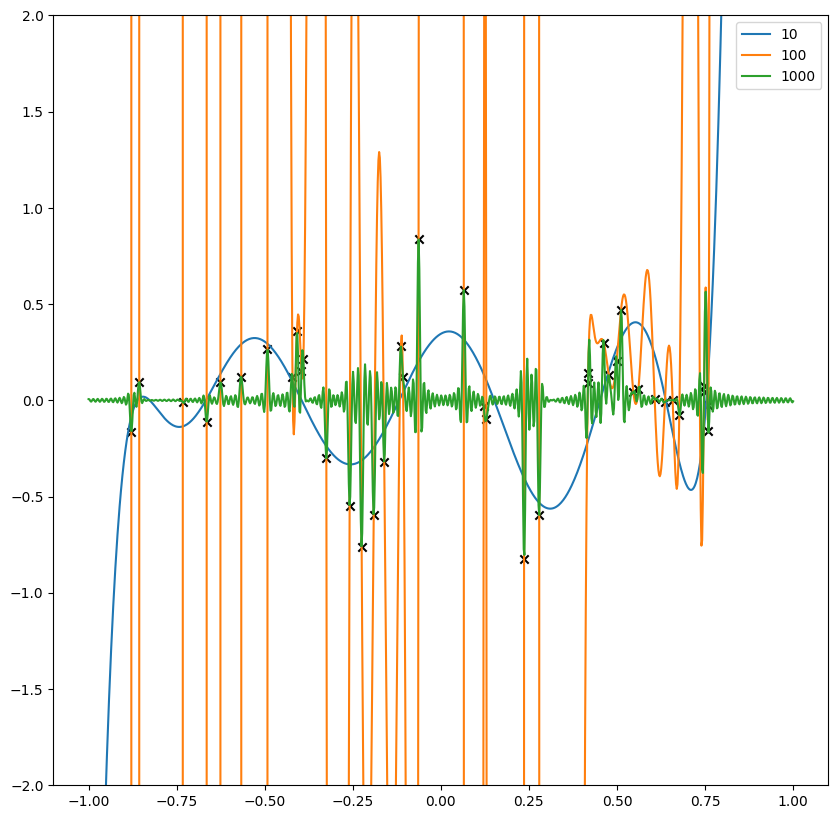

In [6]:
# (b) Use your programming language of choice to create an integer list of terms that are roughly
# equidistant in logarithmic space between 1 and 1,000. For each number of terms, produce
# a fit to the combined data set. Plot a representative subsample of these fits with the data
# used to produce them.

integer_list = np.logspace(1, 3, 3)
x_for_plotting = np.linspace(-1, 1, 1000)

plt.figure(figsize=(10, 10))
plt.scatter(x_full, y_full, marker="x", color="black")

for x_int in integer_list:
    A_tmp = design_mat(int(x_int), x_full)
    theta_hat, sse, rank, s = np.linalg.lstsq(A_tmp, y_full)
    A_tmp = design_mat(int(x_int), x_for_plotting)
    y_for_plotting = A_tmp@theta_hat
    plt.plot(x_for_plotting, y_for_plotting, label=str(int(x_int)))

plt.legend()
plt.ylim(-2, 2)


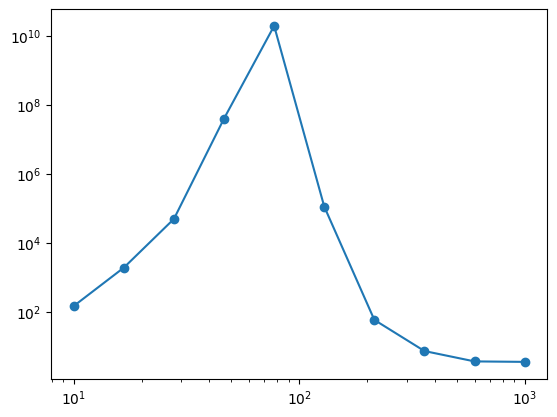

In [7]:
# (c) Assuming that the true signal is characterized by f(x) = e−6x2 cos(4πx), calculate the Eu-
# clidean norm of the difference between the true signal and each of your models for 100 equally
# spaced samples between -1 and 1. Report the cost versus number of terms in a log-log plot.

integer_list = np.logspace(1, 3, 10) # in this plot, we'll use more models
x_spaced = np.linspace(-1, 1, 100)
true_y = np.exp(-6*(x_spaced**2))*np.cos(4*np.pi*x_spaced)
costs = []

for x_int in integer_list:
    x_int = int(x_int)
    A_tmp = design_mat(x_int, x_full)
    theta_hat, sse, rank, s = np.linalg.lstsq(A_tmp, y_full)
    A_tmp = design_mat(x_int, x_spaced)
    y_hat = A_tmp@theta_hat
    norm_tmp = np.linalg.norm(np.abs(y_hat-true_y), ord=2)
    costs.append(norm_tmp)

plt.loglog(integer_list, costs, marker='o') # plotting call from chatGPT


In [8]:
# (d) Using the language of the General Aliasing Decomposition, explain the shape of the plot
# you produced in the prior part.

# In our plot we can observe double descent, with an interpolation threshold at 10^2.
# As we add additional/redundant parameters, they "absorb" the error to smooth out the pattern and 
# better fit the underlying true relationship

# Acknowledgment
Work in this repository and with associated assignments and projects may be adapted or copied from similar files used in my prior academic and industry work (e.g., using a LaTeX file or Dockerfile as a starting point). Those files and any other work in this repository may have been developed with the help of LLM's like ChatGPT. For example, to provide context, answer questions, refine writing, understand function call syntax, and assist with repetitive tasks. In these cases, deliverables and associated work reflect my best efforts to optimize my learning and demonstrate my capacity, while using available resources and LLM's to facilitate the process.


[ChatGPT Conversation](https://chatgpt.com/share/68dda71b-a048-8003-9c49-bbaa27932b07)